# Import Packages

In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [15]:
import numpy
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.layers import Conv2D
#from keras.optimizers import Adam
from keras.utils import np_utils

# Loading the data

In [16]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [17]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


# Understanding the data

In [18]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [19]:
y_train[0]

5

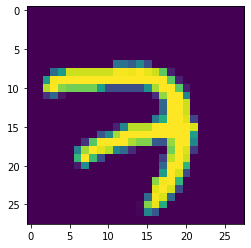

In [20]:
import matplotlib.pyplot as plt
plt.imshow(x_train[5000])

# Reshaping dataset

In [21]:
x_train=x_train.reshape(60000,28,28,1).astype('float32')
x_test=x_test.reshape(10000,28,28,1).astype('float32')

# Applying Hot Encoding

In [22]:
number_of_classes=10
y_train=np_utils.to_categorical(y_train,number_of_classes)
y_test=np_utils.to_categorical(y_test,number_of_classes)

In [23]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Add CNN Layer

In [24]:
model = Sequential()
model.add(Conv2D(64,(3,3),input_shape=(28,28,1),activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(Flatten())
model.add(Dense(number_of_classes,activation='softmax'))

# Compile The model

In [25]:
model.compile(loss='categorical_crossentropy',optimizer="Adam",metrics=['accuracy'])

# Train the model

In [26]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5,batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 90s 48ms/step - loss: 0.2058 - accuracy: 0.9536 - val_loss: 0.1376 - val_accuracy: 0.9632
Epoch 2/5
1875/1875 [==============================] - 90s 48ms/step - loss: 0.0630 - accuracy: 0.9807 - val_loss: 0.0879 - val_accuracy: 0.9750
Epoch 3/5
1875/1875 [==============================] - 91s 48ms/step - loss: 0.0449 - accuracy: 0.9859 - val_loss: 0.0777 - val_accuracy: 0.9776
Epoch 4/5
1875/1875 [==============================] - 91s 49ms/step - loss: 0.0349 - accuracy: 0.9887 - val_loss: 0.0840 - val_accuracy: 0.9798
Epoch 5/5
1875/1875 [==============================] - 90s 48ms/step - loss: 0.0277 - accuracy: 0.9911 - val_loss: 0.0907 - val_accuracy: 0.9778


# Observing the metrics

In [27]:
metrics = model.evaluate(x_test,y_test,verbose=0)
print("Metrics(Test loss & test accuracy):")
print(metrics)

Metrics(Test loss & test accuracy):
[0.09074720740318298, 0.9778000116348267]


# Test the model

In [28]:
prediction=model.predict(x_test[6000:6001])
print(prediction)

[[4.3139385e-17 2.3656642e-18 6.8337776e-16 1.4120522e-08 4.4281965e-06
  2.5969395e-11 3.6343599e-19 1.0077600e-07 1.7953505e-08 9.9999547e-01]]


In [29]:
import numpy as np
print(np.argmax(prediction, axis=1)) 
np.argmax(y_test[5000:5001])

[9]


3

# Save the model

In [32]:
model.save('mnistCNN.h5')
print(model)

In [33]:
!tar -zcvf project.tgz mnistCNN.h5

mnistCNN.h5


In [34]:
ls -1

mnistCNN.h5
models/
project.tgz


In [35]:
!pip install watson-machine-learning-client --upgrade

     |████████████████████████████████| 538 kB 24.2 MB/s eta 0:00:01


In [36]:
from ibm_watson_machine_learning import APIClient

wml_credentials = {
    "url": "https://us-south.ml.cloud.ibm.com",
    "apikey":"YDkQxqYnNmz9hynE2JKYGl4dxY4LAUfPKjFKCWdPlXi6"
}

client = APIClient(wml_credentials)

In [37]:
client = APIClient(wml_credentials)

In [38]:
def guid_from_space_name(client, space_name):
    space = client.spaces.get_details()
    #print(space)
    return(next(item for item in space['resources'] if item['entity']["name"] == space_name)['metadata']['id'])

In [40]:
space_uid = guid_from_space_name(client, "HDR")
print("Space UID = " + space_uid)

Space UID = 828ddb66-7a74-460b-b935-4f4b1dd658a5


In [41]:
client.set.default_space(space_uid)

'SUCCESS'

In [42]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [43]:
software_spec_uid = client.software_specifications.get_uid_by_name("runtime-22.1-py3.9")
software_spec_uid

'12b83a17-24d8-5082-900f-0ab31fbfd3cb'

In [46]:
model_details = client.repository.store_model(model='project.tgz',meta_props={
    client.repository.ModelMetaNames.NAME: "CNN",
    client.repository.ModelMetaNames.TYPE: "tensorflow_2.7",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid}
                                             )

model_id = client.repository.get_model_uid(model_details)

This method is deprecated, please use get_model_id()


/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/ibm_watson_machine_learning/repository.py:1453: UserWarning: This method is deprecated, please use get_model_id()
  warn("This method is deprecated, please use get_model_id()")


In [47]:
model_id

'1af6e8f7-278c-47e3-ae60-658e8f89323e'

In [50]:
loss_and_acc=model.evaluate(x_test,y_test,verbose=2)
print("Test Loss", loss_and_acc[0])
print("Test Accuracy", loss_and_acc[1])

313/313 - 3s - loss: 0.0907 - accuracy: 0.9778 - 3s/epoch - 9ms/step
Test Loss 0.09074720740318298
Test Accuracy 0.9778000116348267


Predicted Value:  7


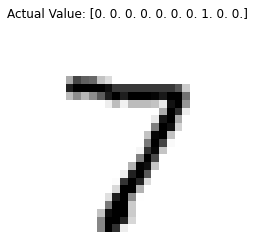

In [54]:
plt.imshow(x_test[0],cmap='gray_r')
plt.title('Actual Value: {}'.format(y_test[0]))
prediction=model.predict(x_test)
plt.axis('off')
print('Predicted Value: ',np.argmax(prediction[0]))
#if(y_test[0]==(np.argmax(prediction[0]))):
#  print('Successful prediction')
#else:
#  print('Unsuccessful prediction')

Predicted Value:  2


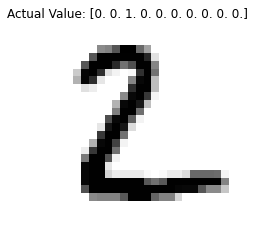

In [58]:
plt.imshow(x_test[1],cmap='gray_r')
plt.title('Actual Value: {}'.format(y_test[1]))
prediction=model.predict(x_test)
plt.axis('off')
print('Predicted Value: ',np.argmax(prediction[1]))


In [63]:
import tensorflow as s
model=s.keras.models.load_model('mnistCNN.h5')  